0 2.004594087600708
1 1.3299378156661987
2 0.9481431841850281
3 0.7316407561302185
4 0.6085346937179565
5 0.5382643938064575
6 0.49792298674583435
7 0.4745585024356842
8 0.4608384072780609
9 0.4526062309741974
10 0.447502464056015
20 0.43280214071273804
30 0.42397981882095337
40 0.4154447019100189
50 0.4071638882160187
60 0.3991297483444214
70 0.39133480191230774
80 0.3837718069553375
90 0.3764338493347168
1000 0.1494535356760025
2000 0.12758830189704895
3000 0.11941280215978622
4000 0.11233282089233398
5000 0.1057121679186821
6000 0.09948933869600296
7000 0.09363583475351334
8000 0.08812804520130157
9000 0.08294493705034256
10000 0.07806698977947235
11000 0.07347609847784042
12000 0.06915529072284698
13000 0.06508870422840118
14000 0.06126129627227783
15000 0.05765901505947113
16000 0.05426865816116333
17000 0.051077697426080704
18000 0.04807440564036369
19000 0.045247796922922134
20000 0.04258747398853302
21000 0.040083616971969604
22000 0.037726953625679016
23000 0.03550895676016807

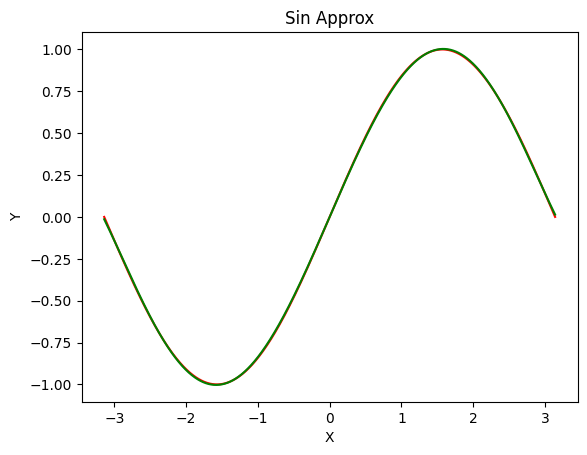

In [1]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 1000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
std = 1e-2
a = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
b = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
c = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
d = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
e = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
f = torch.normal(0, std, (), dtype=dtype, requires_grad=True)

learning_rate = 1e-4
for t in range(200000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + (b * x) + (c * x ** 2) + (d * x ** 3) + (e * x ** 4) + (f * x ** 5)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).mean()
    if t < 10 or (t < 100 and t % 10 == 0) or t % 1000 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad
        f -= learning_rate * f.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        e.grad = None
        f.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4 + {f.item()} x^5')


_y = []

for _x in x:
    res = math.sin(_x)
    approx_res = a + (b * _x) + (c * _x ** 2) + (d * _x ** 3) + (e * _x ** 4) + (f * _x ** 5)
    _y.append(approx_res)


plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(y), color='r', label='sin')
plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(torch.tensor(_y)), color='g', label='approx')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Sin Approx")
plt.show()
